<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>


# **이변량 분석 ④ - 수치형  → 범주형**

- 시각화와 수치화 방법으로 수치형 변수와 범주형 변수 간 관계를 분석합니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/two_var_04.png' width=600 align='left'/>

<img src='https://raw.githubusercontent.com/Jangrae/img/master/analysis4.png' width=620 align='left'/>

## **1. 환경준비**

- 사용할 라이브러리와 분석 대상 데이터를 읽어옵니다.

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (6, 4)

In [2]:
# Titanic 데이터
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic.0.csv'
titanic = pd.read_csv(path)
titanic = titanic.loc[titanic['Age'].notnull()]
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Admission 데이터
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/admission_simple.csv'
admission = pd.read_csv(path)
admission.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


## **2. 시각화**

**1) Histogran**

- **Seaborn**의 **histplot()** 함수로 Histogram을 그립니다.
- Histogram을 사용해 Age 변수의 값 분포를 Survived 변수를 기준으로 나눠서 표시해 봅니다.

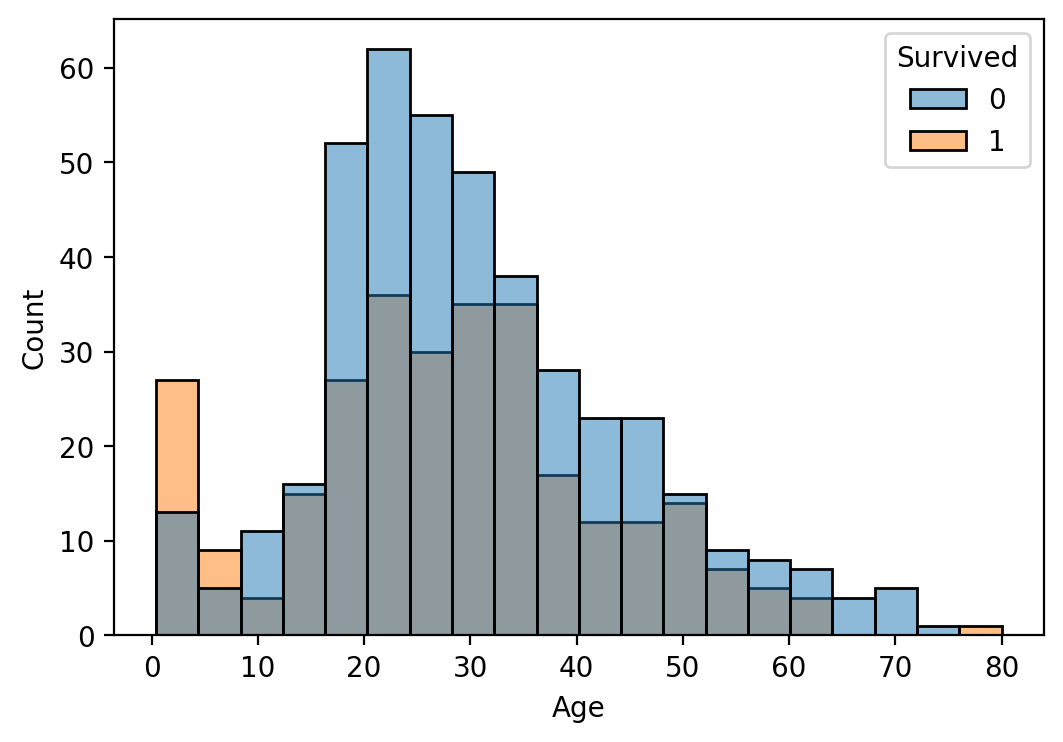

In [4]:
sns.histplot(x='Age', hue='Survived', data=titanic, bins=20)
plt.show()

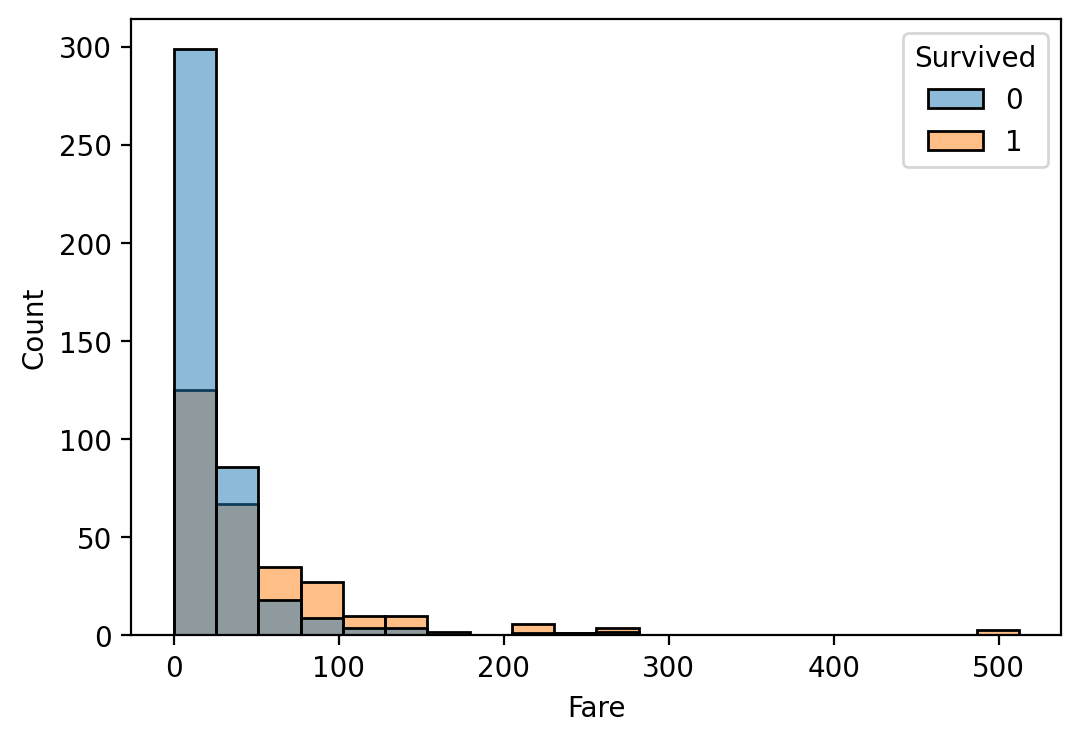

In [5]:
sns.histplot(x='Fare', hue='Survived', bins=20, data=titanic)
plt.show()

**2) Density Plot**

- **Seaborn**의 **kdeplot()** 함수로 Density Plot을 그립니다.

**① kdeplot(..., hue='Survived')**

- 생존 여부의 비율이 유지된 채로 표시됩니다.
- 두 그래프의 아래 면적의 합이 1이 됩니다.

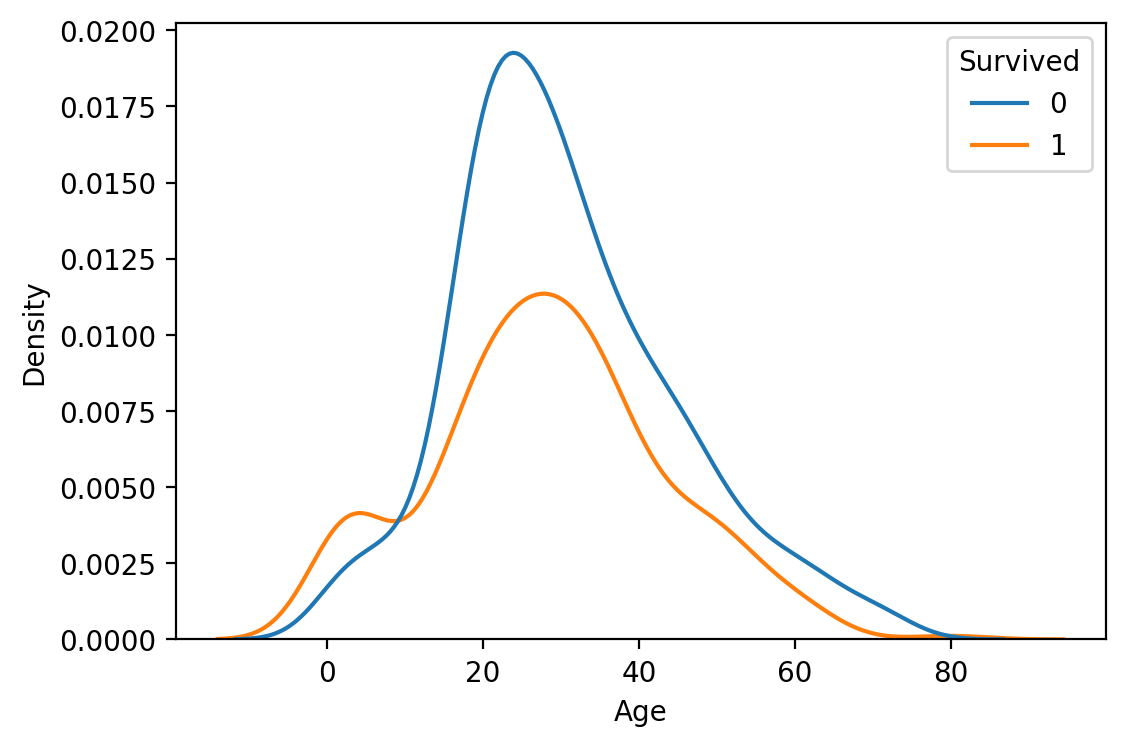

In [6]:
sns.kdeplot(x='Age', hue='Survived', data=titanic)
plt.show()

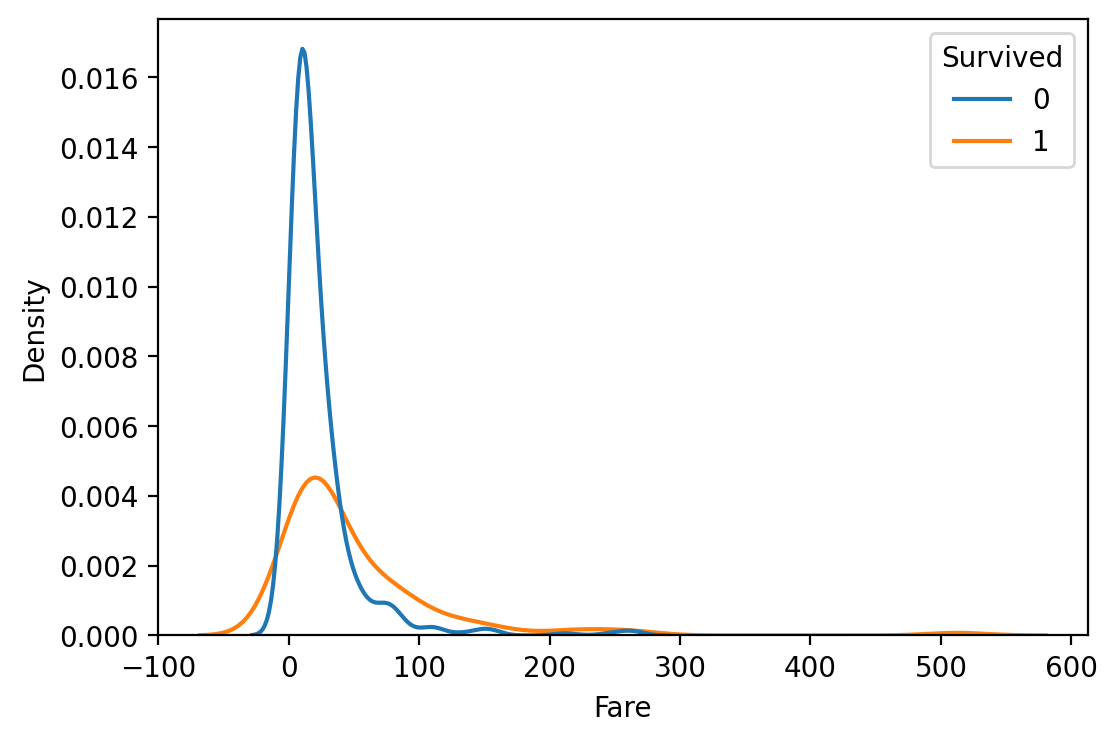

In [7]:
sns.kdeplot(x='Fare', hue='Survived', data=titanic)
plt.show()

**② kdeplot(..., hue='Survived', common_norm=False)**

- **common_norm** 매개변수 값을 **False**로 지정하면 두 그래프 각각의 아래 면적이 1이 됩니다.

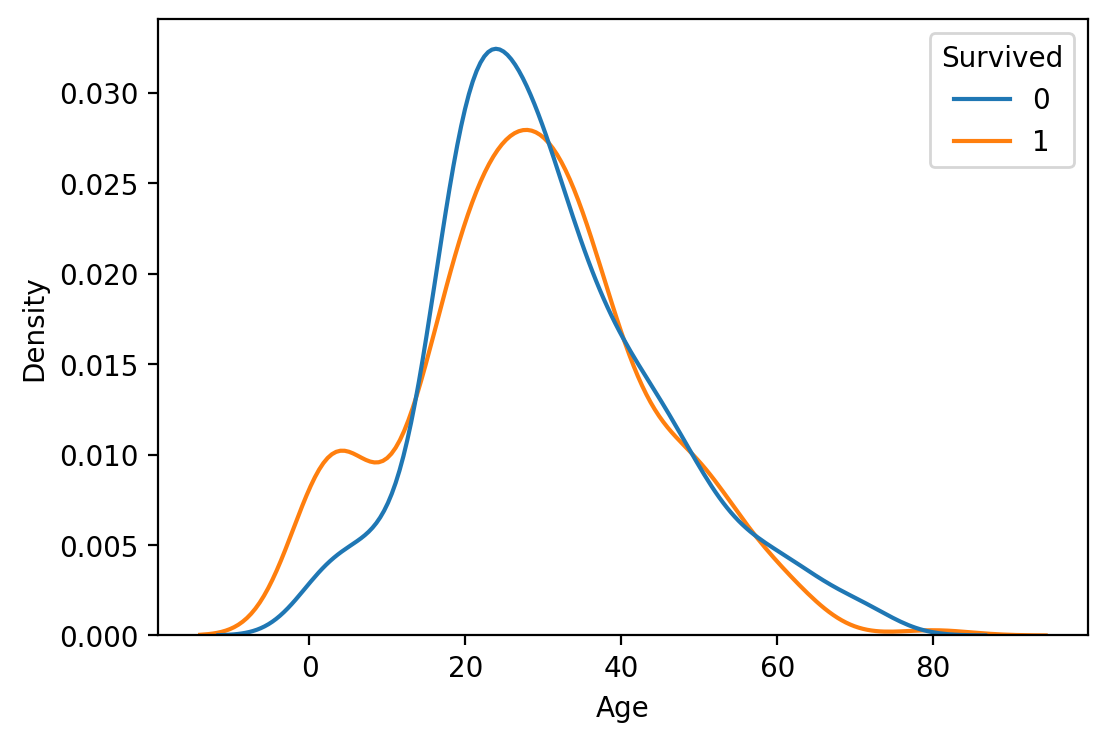

In [8]:
sns.kdeplot(x='Age', hue='Survived', data=titanic, common_norm=False)
plt.show()

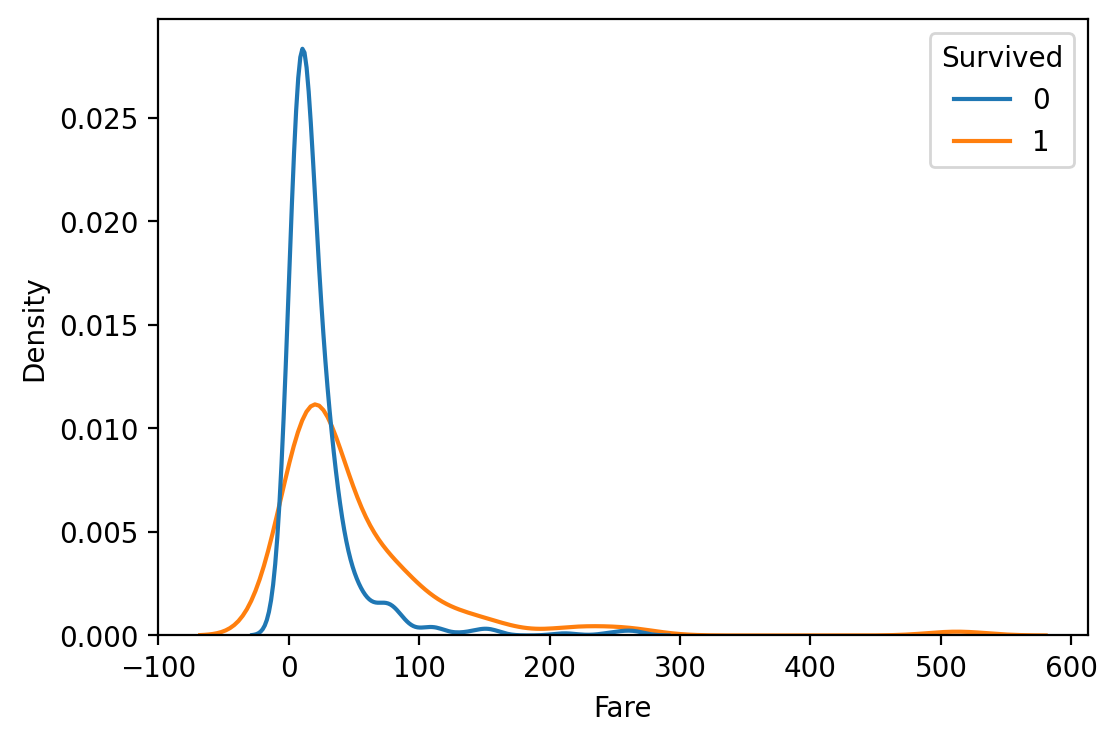

In [9]:
sns.kdeplot(x='Fare', hue='Survived', data=titanic, common_norm=False)
plt.show()

**3) multiple='fill' 지정**

- **multiple** 매개변수 값을 **'fill'** 로 지정해 비율을 비교할 수 있습니다.
- 단, 양의 비교가 아닌 비율을 비교합니다.

**① kdeplot(..., hue='Survived', multiple='fill')**

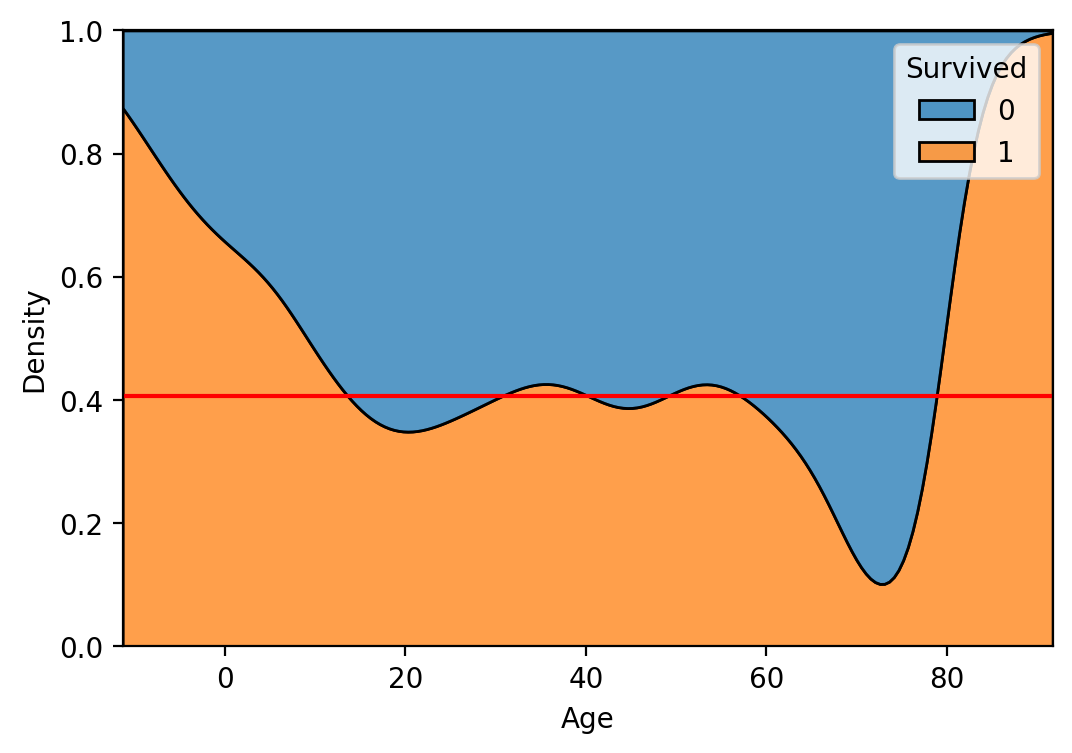

In [10]:
sns.kdeplot(x='Age', hue='Survived', data=titanic, multiple='fill')
plt.axhline(titanic['Survived'].mean(), color='r')
plt.show()

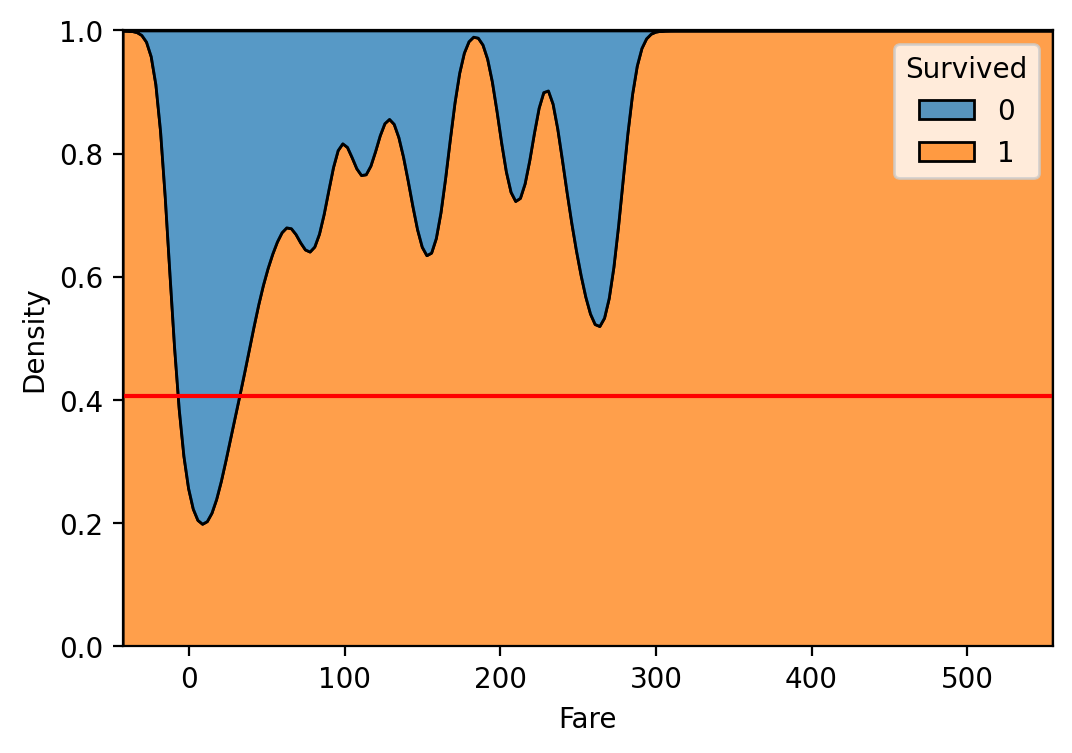

In [11]:
sns.kdeplot(x='Fare', hue='Survived', data=titanic, multiple='fill')
plt.axhline(titanic['Survived'].mean(), color='r')
plt.show()

**① histplot(..., hue='Survived', multiple='fill')**

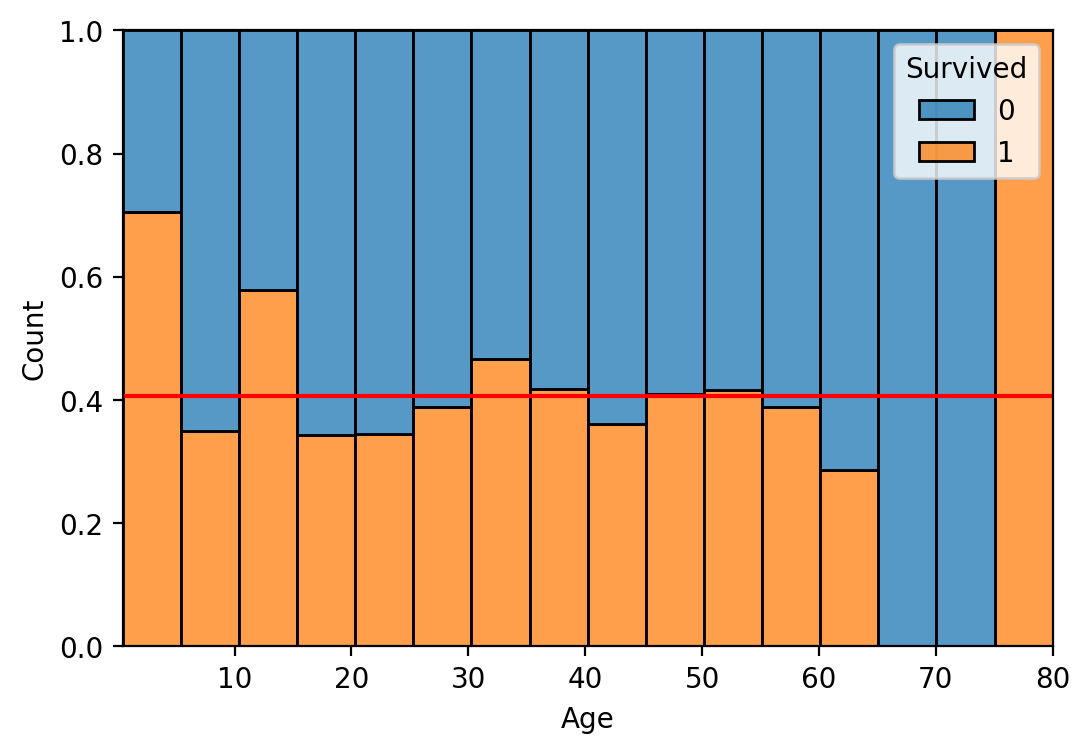

In [12]:
sns.histplot(x='Age', hue='Survived', data=titanic, bins=16, multiple='fill')
plt.axhline(titanic['Survived'].mean(), color='r')
plt.show()

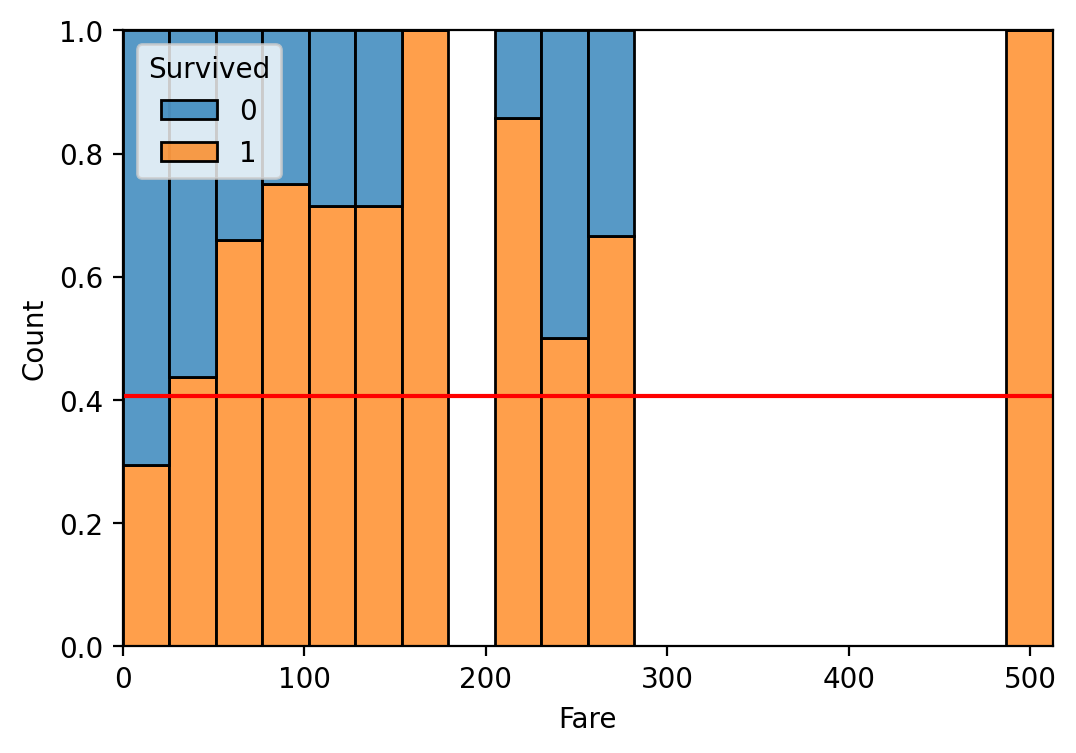

In [13]:
sns.histplot(x='Fare', hue='Survived', data=titanic, bins=20, multiple='fill')
plt.axhline(titanic['Survived'].mean(), color='r')
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

admission 데이터프레임의 다음 변수들 간의 관계를 histplot(), kdeplot() 함수로 시각화해 화인하세요.

**1️⃣ GRE → ADMIT**

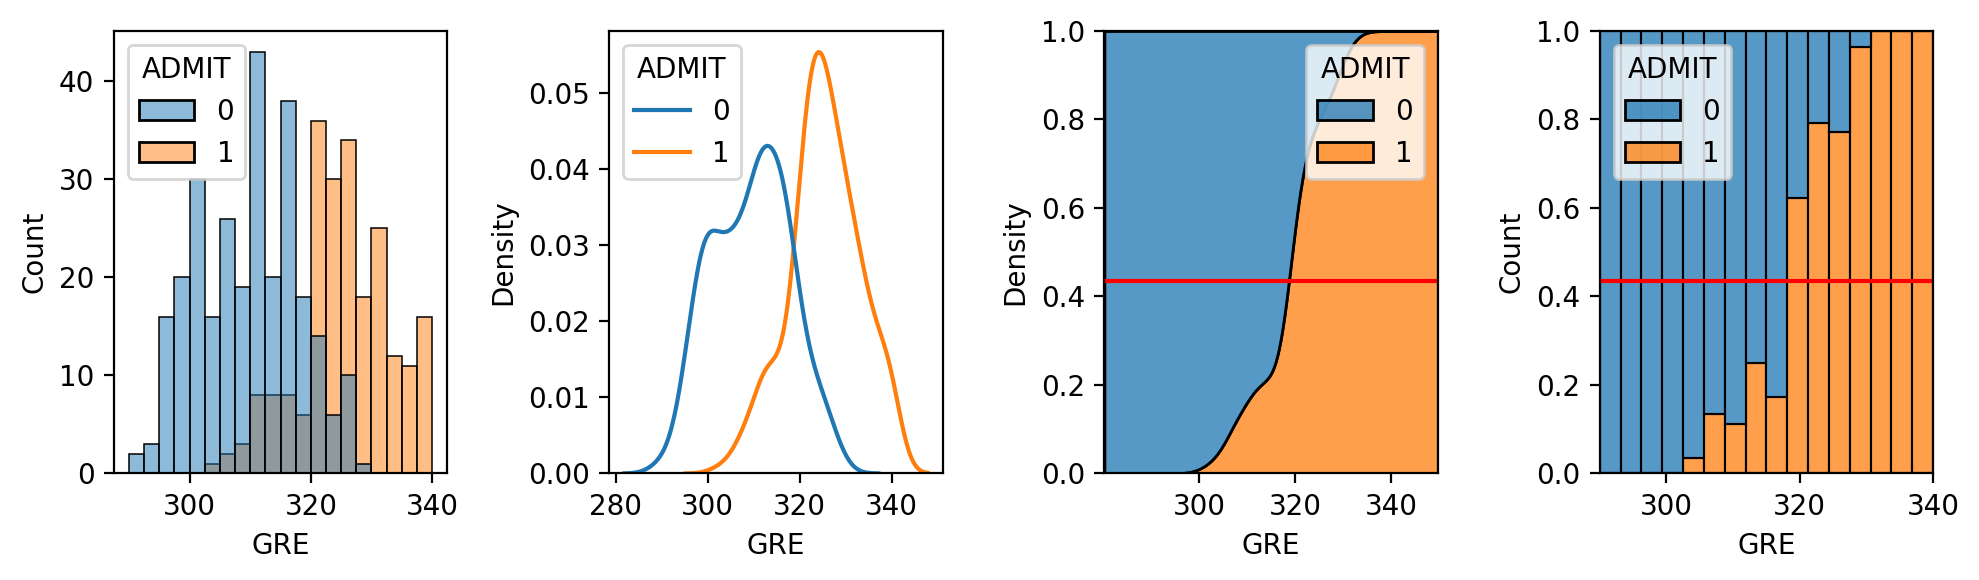

In [26]:
plt.figure(figsize=(10,3))

plt.subplot(1,4,1)
sns.histplot(x='GRE', hue='ADMIT', bins=20, data=admission)

plt.subplot(1,4,2)
sns.kdeplot(x='GRE', hue='ADMIT', data=admission, common_norm=False)

plt.subplot(1,4,3)
sns.kdeplot(x='GRE', hue='ADMIT', data=admission, multiple='fill')
plt.axhline(admission['ADMIT'].mean(), color='r')

plt.subplot(1,4,4)
sns.histplot(x='GRE', hue='ADMIT', data=admission, bins=16, multiple='fill')
plt.axhline(admission['ADMIT'].mean(), color='r')

plt.tight_layout()
plt.show()

**2️⃣ GPA → ADMIT**

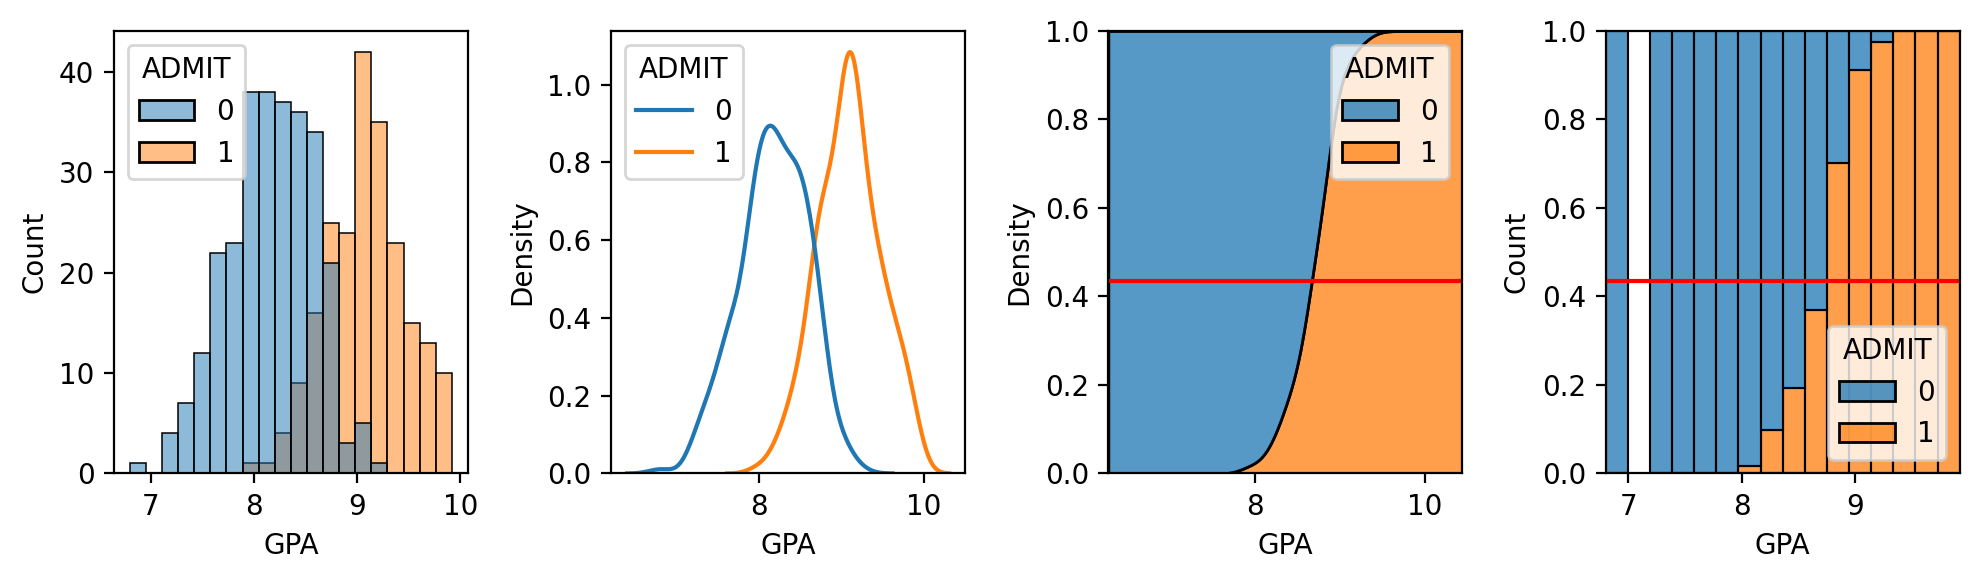

In [27]:
plt.figure(figsize=(10,3))

plt.subplot(1,4,1)
sns.histplot(x='GPA', hue='ADMIT', bins=20, data=admission)

plt.subplot(1,4,2)
sns.kdeplot(x='GPA', hue='ADMIT', data=admission, common_norm=False)

plt.subplot(1,4,3)
sns.kdeplot(x='GPA', hue='ADMIT', data=admission, multiple='fill')
plt.axhline(admission['ADMIT'].mean(), color='r')

plt.subplot(1,4,4)
sns.histplot(x='GPA', hue='ADMIT', data=admission, bins=16, multiple='fill')
plt.axhline(admission['ADMIT'].mean(), color='r')

plt.tight_layout()
plt.show()


**3️⃣ TOEFL → ADMIT**

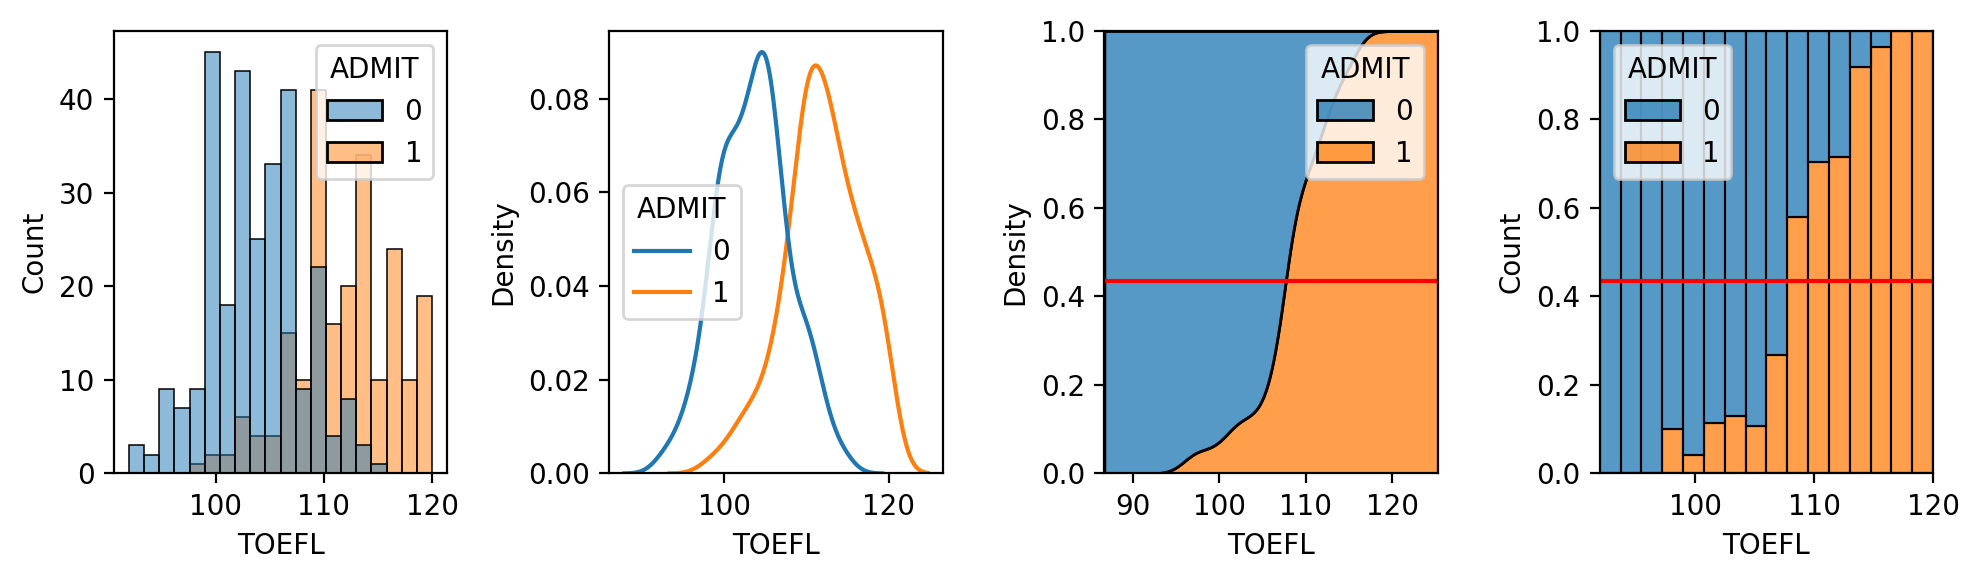

In [28]:
plt.figure(figsize=(10,3))

plt.subplot(1,4,1)
sns.histplot(x='TOEFL', hue='ADMIT', bins=20, data=admission)

plt.subplot(1,4,2)
sns.kdeplot(x='TOEFL', hue='ADMIT', data=admission, common_norm=False)

plt.subplot(1,4,3)
sns.kdeplot(x='TOEFL', hue='ADMIT', data=admission, multiple='fill')
plt.axhline(admission['ADMIT'].mean(), color='r')

plt.subplot(1,4,4)
sns.histplot(x='TOEFL', hue='ADMIT', data=admission, bins=16, multiple='fill')
plt.axhline(admission['ADMIT'].mean(), color='r')

plt.tight_layout()
plt.show()


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>

## **3. 수치화**

- 숫자 vs 범주에 대해 딱 맞는 가설검정 도구가 없으므로, 로지스틱 회귀모델로 부터 p-value를 구해봅니다.

In [29]:
model = sm.Logit(titanic['Survived'], titanic['Age'])
result = model.fit()
print(result.pvalues)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.672504
         Iterations 4
Age    9.909841e-08
dtype: float64
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      713
Method:                           MLE   Df Model:                            0
Date:                Wed, 02 Apr 2025   Pseudo R-squ.:                0.004335
Time:                        16:03:46   Log-Likelihood:                -480.17
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0125      0.002     -5.328      0.000      -0.017      -

In [15]:
model = sm.Logit(titanic['Survived'], titanic['Sex'].map({'male': 1, 'female': 0}))
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.575464
         Iterations 5
Sex    2.704340e-31
dtype: float64


In [16]:
model = sm.Logit(titanic['Survived'], titanic['Parch'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693143
         Iterations 3
Parch    0.93757
dtype: float64


In [17]:
model = sm.Logit(titanic['Survived'], titanic['Fare'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.685885
         Iterations 4
Fare    0.002606
dtype: float64
